In [5]:
import pandas as pd
import numpy as np

In [6]:
import re
import nltk
from nltk.corpus import stopwords

In [7]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [8]:
movie_review=pd.read_csv("E:\Machine-Learning\Dataset\imdb_top_1000.csv")
movie_review.isnull().values.any()
movie_review.shape
movie_review.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
movie_review["Overview"][2]

'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.'

<Axes: xlabel='Meta_score', ylabel='count'>

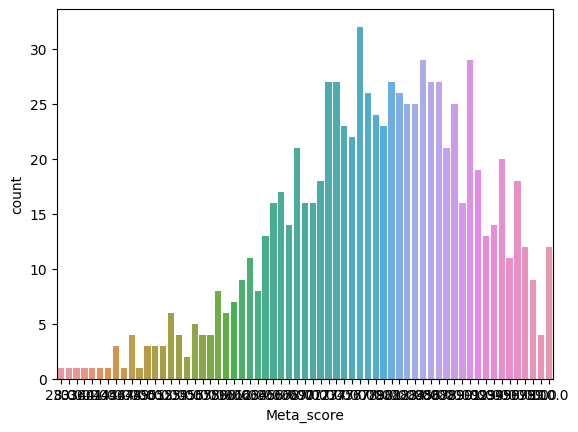

In [10]:
import seaborn as sns
sns.countplot(x='Meta_score', data=movie_review)


In [11]:
def preprocess_text(sen):
    sentence=remove_tags(sen)
    sentence=re.sub('[^a-zA-Z]', ' ', sentence)
    sentence=re.sub(r"\s+[^a-zA-Z]\s+", ' ', sentence)
    sentence=re.sub(r'\s+', ' ', sentence)
    return sentence

In [12]:
TAG_RE= re.compile(r'<[^>]+>')


In [13]:
def remove_tags(text):
    return TAG_RE.sub('', text)

In [14]:
X=[]
sentences = list(movie_review['Overview'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [15]:
movie_review["Overview"][3],X[3]


('The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.',
 'The early life and career of Vito Corleone in s New York City is portrayed while his son Michael expands and tightens his grip on the family crime syndicate ')

In [16]:
y= movie_review['Meta_score']

In [17]:
y=np.array(list(map(lambda x: 1 if x>=60 else 0, y)))

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1=encoder.fit_transform(y)
Y=pd.get_dummies(y1).values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
tokenizer = Tokenizer (num_words=5000)
tokenizer.fit_on_texts (X_train)
X_train = tokenizer.texts_to_sequences (X_train)
X_test = tokenizer.texts_to_sequences (X_test)

In [21]:
sentence=[]
sentence.append('hello hi what')
sent = tokenizer.texts_to_sequences(sentence)
print(sent)

[[145]]


In [22]:
vocab_size=len(tokenizer.word_index)+1
maxlen=100
X_train=pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test=pad_sequences(X_test, padding='post', maxlen=maxlen)

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [24]:
embeddings_dictionary=dict()
glove_file = open("E:\Machine-Learning\Dataset\imdb_top_1000.csv", encoding="utf8")

In [28]:
for line in glove_file:
    records=line.split()
    word=records[0]
    vector_dimensions=asarray(records[1:], dtype='float32')
    embeddings_dictionary[word]=vector_dimensions
glove_file.close()

ValueError: could not convert string to float: 'Godfather:'